In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import warnings
import os

from colorcet import palette

warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
sns.set()

### Task 1 : Merge the 12 months of sales data into a single csv file

In [2]:
files = os.listdir('../Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')
print(files)
df = pd.DataFrame()
for i in files:
    hold = pd.read_csv("../Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/"+i)
    df = pd.concat([df,hold])
print(df)

['Sales_May_2019.csv', 'Sales_March_2019.csv', 'Sales_December_2019.csv', 'Sales_September_2019.csv', 'Sales_October_2019.csv', 'Sales_February_2019.csv', 'Sales_June_2019.csv', 'Sales_January_2019.csv', 'Sales_April_2019.csv', 'Sales_November_2019.csv', 'Sales_July_2019.csv', 'Sales_August_2019.csv']
      Order ID                     Product Quantity Ordered Price Each  \
0       194095            Wired Headphones                1      11.99   
1       194096       AA Batteries (4-pack)                1       3.84   
2       194097            27in FHD Monitor                1     149.99   
3       194098            Wired Headphones                1      11.99   
4       194099      AAA Batteries (4-pack)                2       2.99   
...        ...                         ...              ...        ...   
12006   248146  Bose SoundSport Headphones                1      99.99   
12007   248147      AAA Batteries (4-pack)                3       2.99   
12008   248148       AA Batteri

In [3]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
5,194100,iPhone,1,700.0,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016"
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215"
7,194102,Lightning Charging Cable,1,14.95,05/07/19 12:49,"166 4th St, Dallas, TX 75001"
8,194103,27in FHD Monitor,1,149.99,05/24/19 18:28,"759 Pine St, Seattle, WA 98101"
9,194104,Wired Headphones,1,11.99,05/04/19 18:38,"330 1st St, Seattle, WA 98101"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 12010
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


<AxesSubplot:>

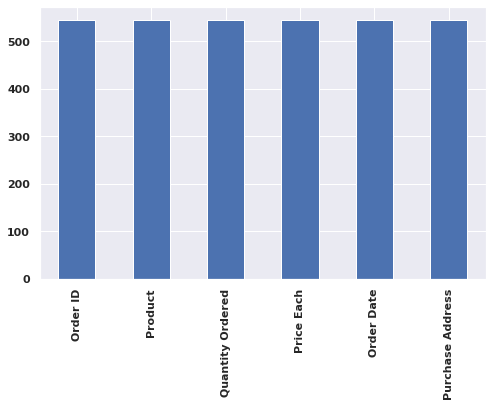

In [5]:
df.isna().sum().plot(kind="bar")

In [6]:
fig = px.bar(x=df.isna().sum().index, y=df.isna().sum(), title="Null Bar plot", color=df.isna().sum().index)
fig.update_layout(
    xaxis_title = "Column name",
    yaxis_title = "Number of null values",
)
fig.show()

In [7]:
df.isna().sum()/186850

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

### Task 2 : what was the best month for sales ? how much was earned that month ? 

In [8]:
df = df.dropna(how = 'any')

In [9]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df["Order Date"]

0        05/16/19 17:14
1        05/19/19 14:43
2        05/24/19 11:36
3        05/02/19 20:40
4        05/11/19 22:55
              ...      
12006    08/29/19 22:19
12007    08/31/19 16:26
12008    08/02/19 07:25
12009    08/08/19 12:10
12010    08/16/19 08:13
Name: Order Date, Length: 186305, dtype: object

In [11]:
# df = df[~df["Order Date"].str.contains("^Order.+")]

In [12]:
# df["Order Month"] = df["Order Date"].dt.month

In [13]:
# df["Order Month"]

In [14]:
# df.info()

In [15]:
# grouped = df.groupby("Order Month")["Quantity Order"]
# grouped

In [16]:
df = df[~df['Order Date'].str.contains('Order.+')]

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [18]:
df["Order Date"]

0       2019-05-16 17:14:00
1       2019-05-19 14:43:00
2       2019-05-24 11:36:00
3       2019-05-02 20:40:00
4       2019-05-11 22:55:00
                ...        
12006   2019-08-29 22:19:00
12007   2019-08-31 16:26:00
12008   2019-08-02 07:25:00
12009   2019-08-08 12:10:00
12010   2019-08-16 08:13:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [19]:
df.iloc[0][-2].month

5

In [20]:
# df['month'] = df['Order Date'].apply(lambda x : x.month)

In [21]:
# df["month"] = df["Order Date"].apply(lambda x: x.month)

In [22]:
# df["month"]

In [23]:
df["month"] = df["Order Date"].dt.month
df["month"]

0        5
1        5
2        5
3        5
4        5
        ..
12006    8
12007    8
12008    8
12009    8
12010    8
Name: month, Length: 185950, dtype: int64

In [24]:
df['year'] = df['Order Date'].apply(lambda x : x.year)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12010
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int64         
 7   year              185950 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 12.8+ MB


In [26]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,2019
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,2019
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,2019
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,2019
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,2019


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12010
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int64         
 7   year              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 12.8+ MB


In [28]:
df["sales"] = df["Quantity Ordered"]*df["Price Each"]
df["sales"]

0         11.99
1          3.84
2        149.99
3         11.99
4          5.98
          ...  
12006     99.99
12007      8.97
12008      3.84
12009     11.95
12010      3.84
Name: sales, Length: 185950, dtype: float64

In [29]:
# df['sales'] = df['Quantity Ordered'] * df['Price Each']
# df.head()

In [30]:
sales = df.groupby('month')['sales'].sum()

<BarContainer object of 12 artists>

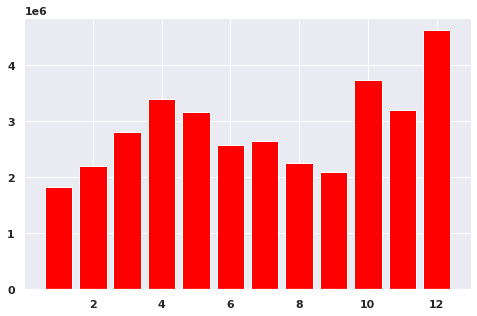

In [31]:
sales = sales.sort_values(ascending = False)
plt.bar(sales.index , sales.values, color= "red")

In [32]:
sales

month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: sales, dtype: float64

In [33]:
px.bar(x=pd.to_datetime(sales.index, format="%m"),y=sales.values,color=sales.index)

###  Task 3 : what city had the highest number of sales ?

In [34]:
df["Purchase Address"]

0            669 2nd St, New York City, NY 10001
1                844 Walnut St, Dallas, TX 75001
2        164 Madison St, New York City, NY 10001
3                622 Meadow St, Dallas, TX 75001
4                17 Church St, Seattle, WA 98101
                          ...                   
12006    868 Hickory St, San Francisco, CA 94016
12007          206 Lakeview St, Boston, MA 02215
12008             568 13th St, Seattle, WA 98101
12009     495 Walnut St, San Francisco, CA 94016
12010         738 Park St, Los Angeles, CA 90001
Name: Purchase Address, Length: 185950, dtype: object

In [35]:
df['city'] = df['Purchase Address'].apply(lambda x : x.split(',')[1]+' '+ x.split(',')[-1].split(' ')[-2])

In [36]:
df["city"]

0         New York City NY
1                Dallas TX
2         New York City NY
3                Dallas TX
4               Seattle WA
               ...        
12006     San Francisco CA
12007            Boston MA
12008           Seattle WA
12009     San Francisco CA
12010       Los Angeles CA
Name: city, Length: 185950, dtype: object

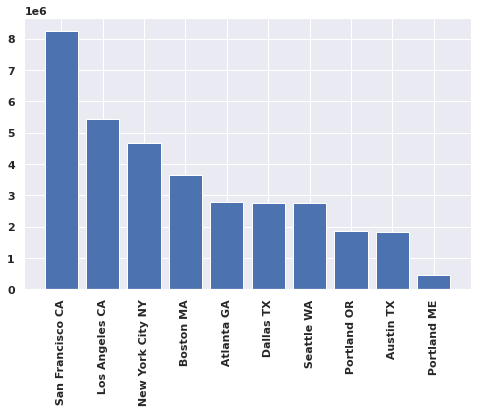

In [37]:
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending = False)
plt.bar(city_sales.index , city_sales.values)
plt.xticks(rotation = 90)
plt.show()

In [53]:
fig = px.bar(x=city_sales.index, y=city_sales.values, color=city_sales.index, labels={"color":"City"})
fig.update_xaxes(title = "City", ticks = "outside", tickangle=-90)
fig.update_layout(title = "City Sales",)
fig.show()

### Task 4 : what time should we display advertisements to maximize of customer's buying product ? 

In [39]:
df['hour'] = df['Order Date'].apply(lambda x : x.hour)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,sales,city,hour
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,2019,11.99,New York City NY,17
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,2019,3.84,Dallas TX,14
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,2019,149.99,New York City NY,11
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,2019,11.99,Dallas TX,20
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,2019,5.98,Seattle WA,22


In [40]:
df["Hour"] = df["Order Date"].dt.hour
time = df["Hour"].value_counts(sort=True, ascending=False)

In [41]:
type(time.index)

pandas.core.indexes.numeric.Int64Index

In [42]:
px.scatter(x=pd.to_datetime(time.index, format="%H"), y=time.values, size=time.values, color = time.index)

In [61]:
px.histogram(x=time.index, y=time, nbins=50,)

<AxesSubplot:xlabel='Hour', ylabel='Density'>

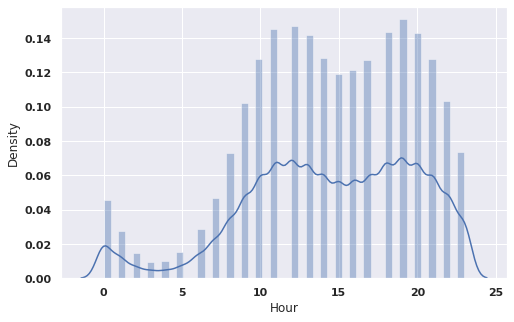

In [43]:
sns.distplot(df["Hour"])

### Task 5 : what products are most often sold together ?  

In [44]:
new_df = df[df['Order ID'].duplicated(keep = False)]

In [45]:
products = new_df.groupby('Order ID')['Product'].apply(lambda x : ','.join(x))

In [46]:
from itertools import combinations
from collections import Counter
count = Counter()
for i in products.values:
    x = i.split(',')
    x = sorted(x)
    count.update(Counter(combinations(x,2)))
most_common = count.most_common(10)

In [47]:
most_common

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 368),
 (('Bose SoundSport Headphones', 'Google Phone'), 228),
 (('USB-C Charging Cable', 'Wired Headphones'), 205),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Lightning Charging Cable', 'Wired Headphones'), 129)]

In [48]:
products.value_counts()

iPhone,Lightning Charging Cable                                                882
Google Phone,USB-C Charging Cable                                              856
iPhone,Wired Headphones                                                        361
Vareebadd Phone,USB-C Charging Cable                                           312
Google Phone,Wired Headphones                                                  303
                                                                              ... 
Google Phone,USB-C Charging Cable,USB-C Charging Cable                           1
ThinkPad Laptop,27in 4K Gaming Monitor                                           1
iPhone,Google Phone                                                              1
Vareebadd Phone,27in FHD Monitor                                                 1
Google Phone,USB-C Charging Cable,Wired Headphones,Apple Airpods Headphones      1
Name: Product, Length: 366, dtype: int64

### Task 6 : what product sold the most ? why do you think it sold the most ?